 <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Nombre y Apellido: Fabian Villada

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


<div class="alert alert-block alert-warning">
<img src="./ojo.svg" align="left" width="50" />  Normalice la amplitud máxima de todas las ventanas a 0 dB.
</div>

In [4]:


# Insertar aquí el código para inicializar tu notebook
########################################################

import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

#Config Tamaño de Plots
plt.rcParams['figure.figsize'] = [14, 7]



<ipython-input-8-f5f0fcabbd26>:34: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(np.abs(A))
<ipython-input-8-f5f0fcabbd26>:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem( freq3 , B[0:len(freq3)])
<ipython-input-8-f5f0fcabbd26>:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem( freq3 , B[0:len(freq3)])
<ipython-input-8-f5f0fcabbd26>:76: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(np.abs(A))
<ipython-i

Text(0.5, 0, ' frequency ')

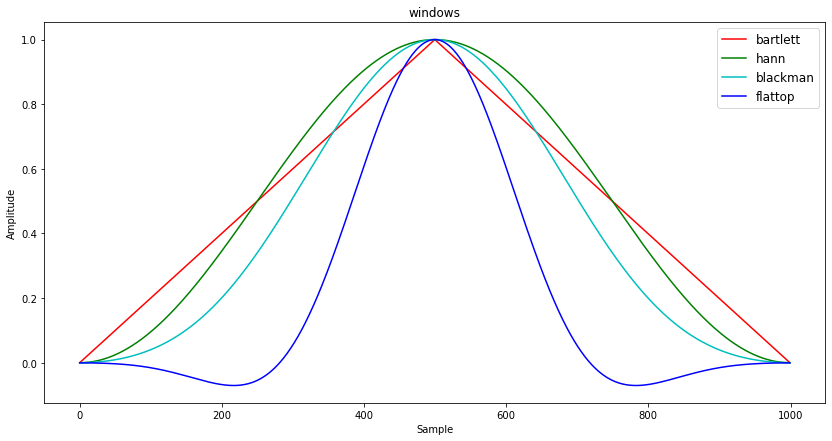

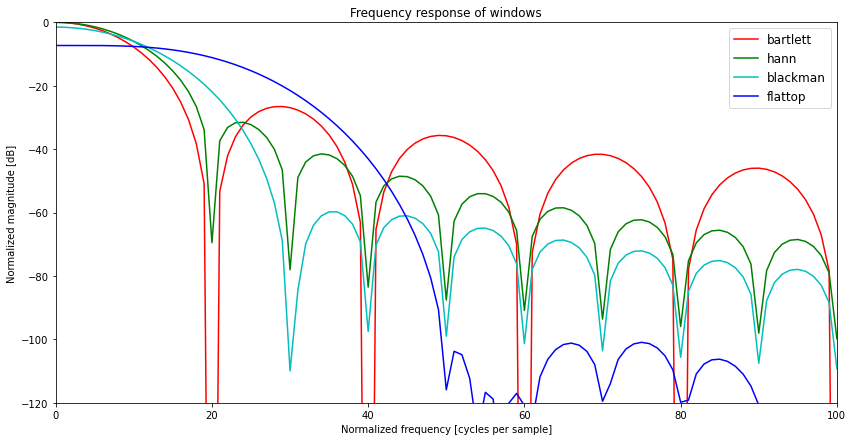

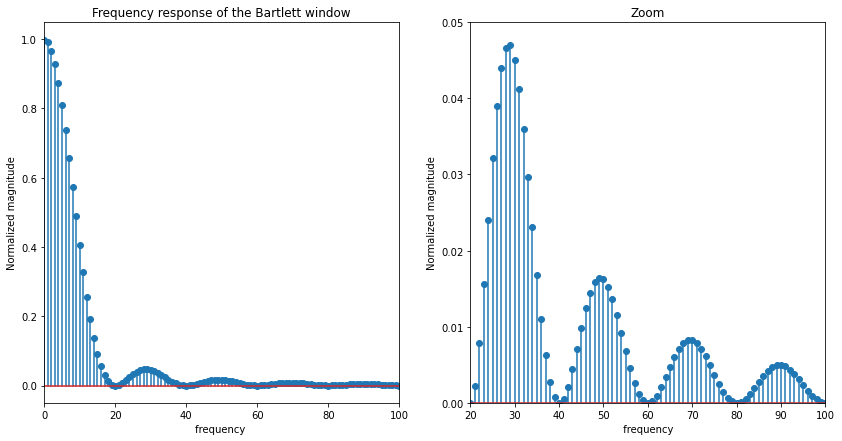

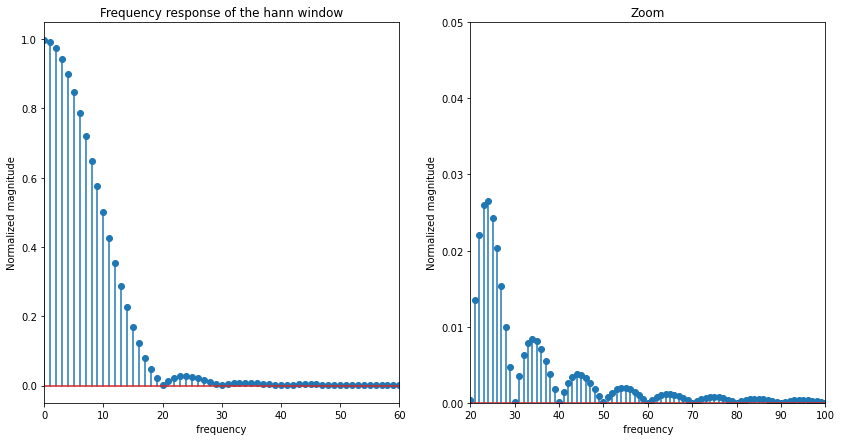

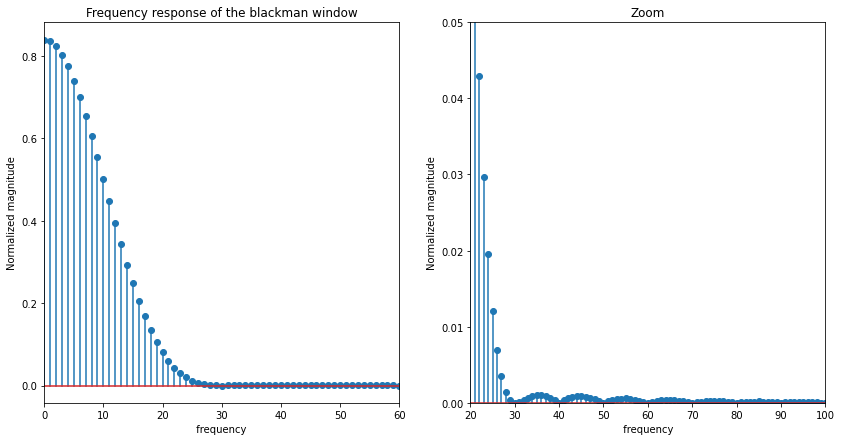

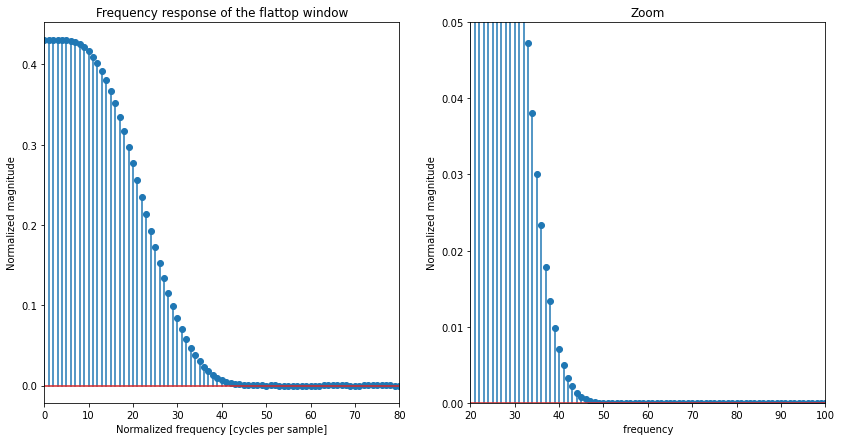

In [8]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

N  = 1000 # muestras
fs = 1000 # Hz
df = fs/N
n = 10*N

xmin = 0
xmax = 100
ymin = -120
ymax = 0

##############################    WINDOW BARTLETT  ###########################################

window = signal.bartlett(N)

plt.figure(1)
plt.plot(window, color='r' , label='bartlett')
plt.legend(loc='upper right', fontsize='large')
plt.title("Bartlett window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure(2)
A = fft(window , n) / (len(window)/2.0) # el parametro n determina Length of the transformed axis of the output. 
                                        #If n is smaller than the length of the input, the input is 
                                        #cropped. If it is larger, the input is padded with zeros. 
                                        #If n is not given, the length of the input along the 
                                        #axis specified by axis is used.
                                        #EN SINTESIS ES COMO HACER UN ZERO PADING si n es mayor que N
freq = np.arange(0 , fs/2 , df)
response = 20 * np.log10(np.abs(A))        
plt.plot(freq, response[0:len(freq)] , color = 'r' , label = 'bartlett' )
plt.legend(loc='upper right', fontsize='large')
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Frequency response of the Bartlett window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

plt.figure(3)
plt.subplot(1,2,1)
B = np.abs(A)
freq3 = np.arange(0 , fs/2 , df)
plt.stem( freq3 , B[0:len(freq3)])
plt.xlim(0,100)
plt.title("Frequency response of the Bartlett window")
plt.ylabel("Normalized magnitude")
plt.xlabel("frequency ")
plt.subplot(1,2,2)
plt.stem( freq3 , B[0:len(freq3)])
plt.xlim(20,100)
plt.ylim(0,0.05)
plt.title("Zoom")
plt.ylabel("Normalized magnitude")
plt.xlabel(" frequency ")


####################################  WINDOW HANN   ################################################


window = signal.hann(N)

plt.figure(1)
plt.plot(window , color = 'g' , label='hann')
plt.legend(loc='upper right', fontsize='large')
plt.title("Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")


plt.figure(2)
A = fft(window , n) / (len(window)/2.0)
freq = np.arange(0 , fs/2 , df)
response = 20 * np.log10(np.abs(A))        
plt.plot(freq, response[0:len(freq)] , color = 'g' , label = 'hann' )
plt.legend(loc='upper right', fontsize='large')
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Frequency response of the Hann window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

plt.figure(4)
plt.subplot(1,2,1)
B = np.abs(A)
freq3 = np.arange(0 , fs/2 , df)
plt.stem( freq3 , B[0:len(freq3)])
plt.xlim(0,60)
plt.title("Frequency response of the hann window")
plt.ylabel("Normalized magnitude")
plt.xlabel(" frequency ")
plt.subplot(1,2,2)
plt.stem( freq3 , B[0:len(freq3)])
plt.xlim(20,100)
plt.ylim(0,0.05)
plt.title("Zoom")
plt.ylabel("Normalized magnitude")
plt.xlabel(" frequency ")


###########################  WINDOW BLACKMAN  ###################################################

window = signal.blackman(N)

plt.figure(1)
plt.plot(window, color='c' , label='blackman')
plt.legend(loc='upper right', fontsize='large')
plt.title("Blackman window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure(2)
A = fft(window , n) / (len(window)/2.0)
freq = np.arange(0 , fs/2 , df)
response = 20 * np.log10(np.abs(A))        
plt.plot(freq, response[0:len(freq)] , color = 'c' , label = 'blackman' )
plt.legend(loc='upper right', fontsize='large')
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Frequency response of the Blackman window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

plt.figure(5)
plt.subplot(1,2,1)
B = np.abs(A)
freq3 = np.arange(0 , fs/2 , df)
plt.stem( freq3 , B[0:len(freq3)])
plt.xlim(0,60)
plt.title("Frequency response of the blackman window")
plt.ylabel("Normalized magnitude")
plt.xlabel(" frequency ")
plt.subplot(1,2,2)
plt.stem( freq3 , B[0:len(freq3)])
plt.xlim(20,100)
plt.ylim(0,0.05)
plt.title("Zoom")
plt.ylabel("Normalized magnitude")
plt.xlabel(" frequency ")



window = signal.flattop(N)

plt.figure(1)
plt.plot(window , color='b' , label='flattop')
plt.legend(loc='upper right', fontsize='large')
plt.title("windows")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure(2)
A = fft(window, n) / (len(window)/2.0)
freq = np.arange( 0 , fs , df)
response = 20 * np.log10(np.abs(A))
plt.plot(freq, response[0:len(freq)] , color='b', label = 'flattop')
plt.legend(loc='upper right', fontsize='large')
plt.axis([xmin, xmax, ymin, ymax]) #xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
plt.title("Frequency response of windows")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

plt.figure(6)
plt.subplot(1,2,1)
B = np.abs(A)
freq3 = np.arange(0 , fs/2 , df)
plt.stem( freq3 , B[0:len(freq3)])
plt.xlim(0,80)
plt.title("Frequency response of the flattop window")
plt.ylabel("Normalized magnitude")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.subplot(1,2,2)
plt.stem( freq3 , B[0:len(freq3)])
plt.xlim(20,100)
plt.ylim(0,0.05)
plt.title("Zoom")
plt.ylabel("Normalized magnitude")
plt.xlabel(" frequency ")



 <div class="alert alert-block alert-warning">
<b>Nota:</b> Se representan graficos adicionales de los espectros de las distintas ventanas en escala lineal donde podemos apreciar como  van concentrando energia en el lobulo principal , variando el ancho del mismo y la cantidad de energia desparramada en lobulos secundarios. La ventana flattop casi no desparrama energia en los lobulos secundarios pero tiene un ancho de lobulo principal apreciable. La ventana bartlett tiene el lobulo principal mas angosto pero desparrama energia en lobulos secundarios con la amplitud mas grande comparada con las demas ventanas.
Como conclusion se  deduce que al momento de seleccionar la ventana tengo una solucion de compromiso entre el ancho del lobulo principal y la energia que se desparramara en los lobulos secundarios. 
</div> 

b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [19]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (#),$W_2$ (dB)
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

Text(0.5, 0, 'Tiempo [s]')

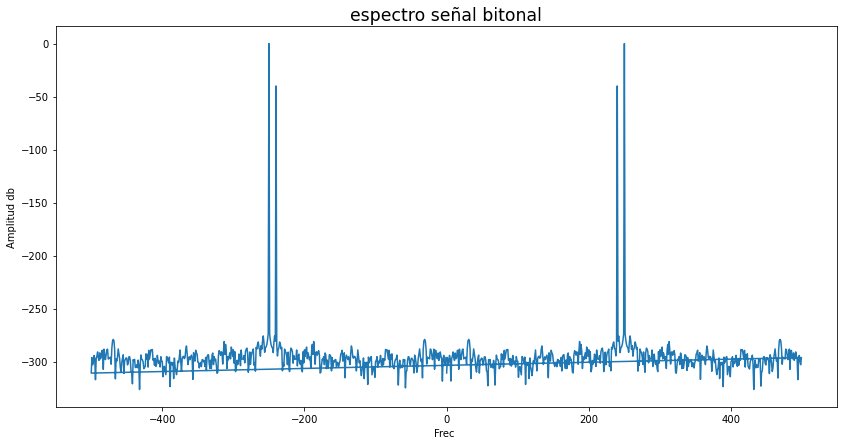

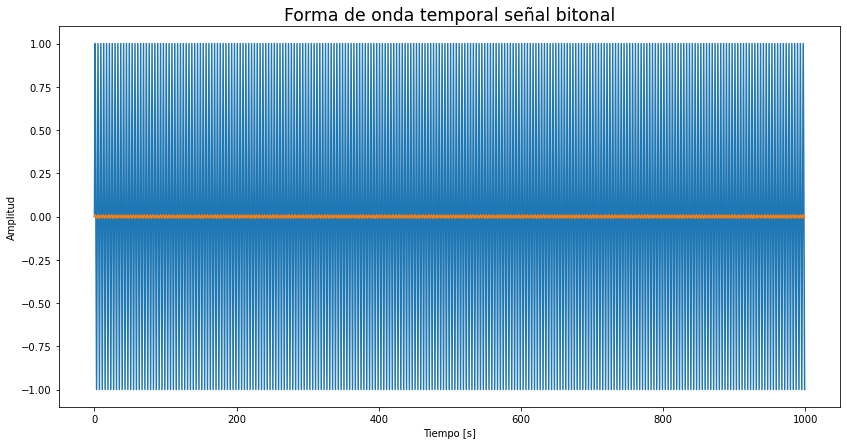

In [5]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

"""

xx1: señal tono f0 " pi/2 = fs/4 ya que df=fs/N = 2pi/N"
xx2: señal tono f1 = f1 + 10 * (resolucion espectral)
xx3 : señal bitonal
fftabs: modulo espectro frecuencial calculado con numpy fft


@author: Fabian Villada
"""

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.fft import fft

#Config Tamaño de Plots
plt.rcParams['figure.figsize'] = [14, 7]

##############################################################################
def generador_senoidal (fs, f0, N, a0, p0):
    '''Genera una senial senoidal con los parametros indicados.

    Keyword arguments:
    a0 -- Valor pico de la senoidal
    f0 -- frecuencia de la senial
    ph -- fase de la senial
    N -- numero de muestras de la senial
    fs - frecuencia de muestro de la senial
                                

    Returns: array of float, array of float

    ''' 
   
    tt=np.arange(N/fs , step=1/fs)
    xx = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, xx   

##############################################################################


N  = 1000 # muestras
fs = 1000 # Hz
df = fs/N # resolucion espectral equivale a( 2 * np.pi/N )

a1 = 1  # Volts
p1 = 0 
f1 =  fs/4   # mitad dd la banda digital


a2_db = -40 # 20*log a2 = -40
a2 = a1 *[ 10**(a2_db/20) ]
p2 = 0
f2 = f1 + 10 * df

Norma = N/2 # Criterio de Normalizacion



##### construyo señal temporal #######

tt , xx1 = generador_senoidal(fs=fs , f0=f1 , N = N , a0 = a1 , p0 = p1)
tt , xx2 = generador_senoidal(fs=fs , f0=f2 , N = N , a0 = a2 , p0 = p2)
xx3 = xx1 + xx2

###### Evaluo espectro con numpy fft #######

fftabs = np.abs(np.fft.fft(xx3))/Norma
fftabs = np.fft.fftshift(fftabs, axes=0)
fftabs = 20*np.log10(fftabs)
freq = np.fft.fftfreq(len(xx3),1/N)

######Graficos###########

plt.figure(1)
plt.plot(freq , fftabs , label='')
plt.title('espectro señal bitonal', fontsize = 'xx-large')
plt.ylabel('Amplitud db')
plt.xlabel('Frec ')

plt.figure(2)
plt.plot(xx1)
plt.plot(xx2)
plt.title('Forma de onda temporal señal bitonal', fontsize = 'xx-large')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo [s]')



<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

In [21]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################


<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

,$a_2$ (dB)
leve,-55
moderada,-25
máxima,3


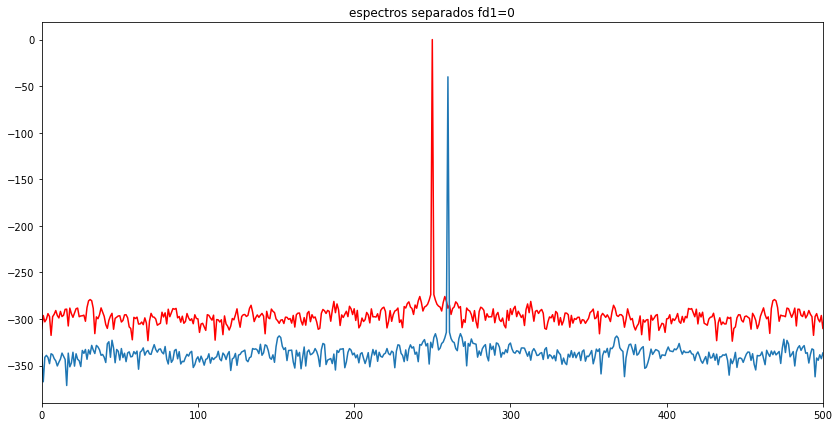

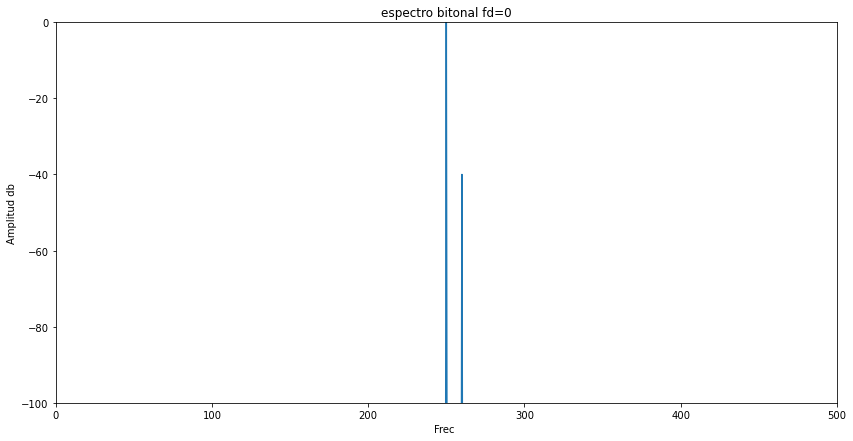

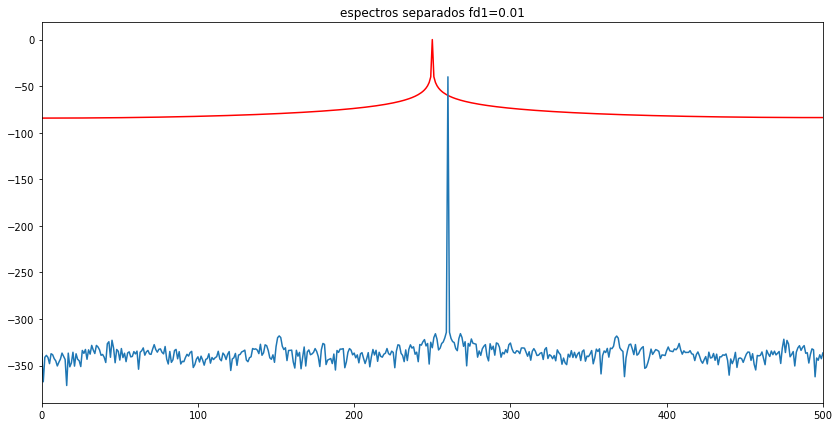

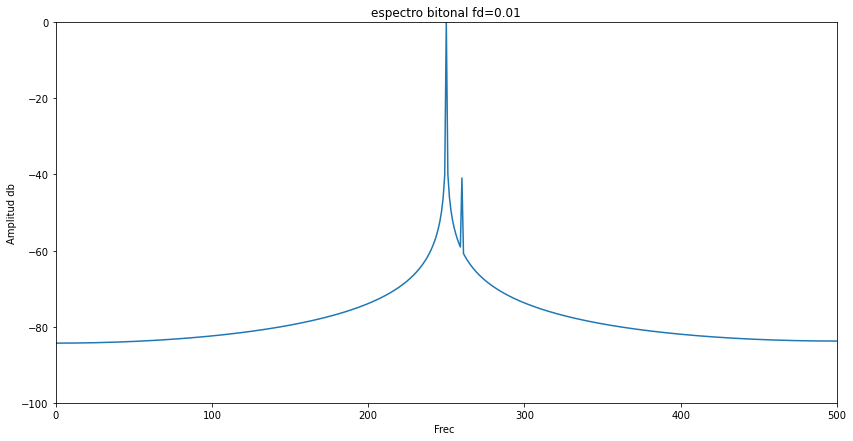

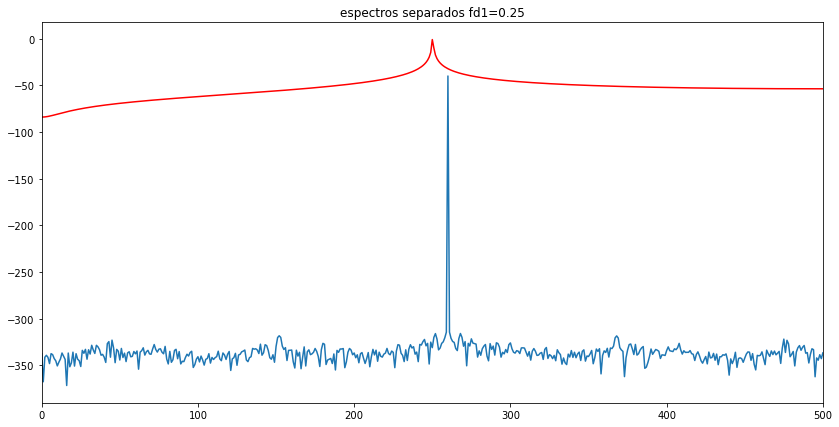

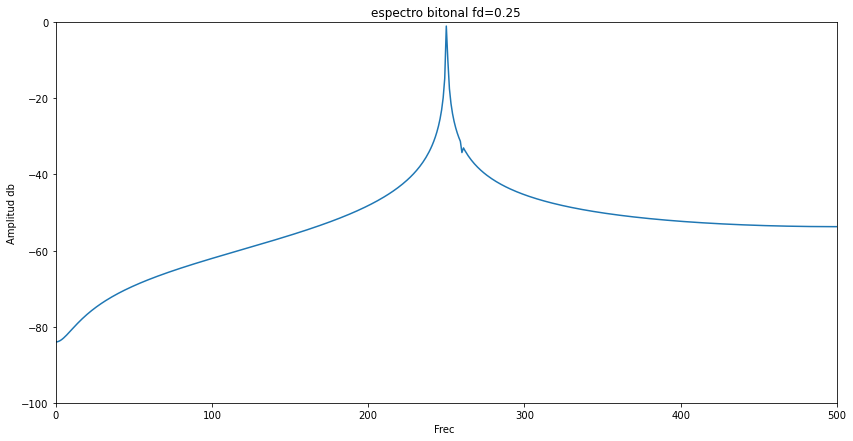

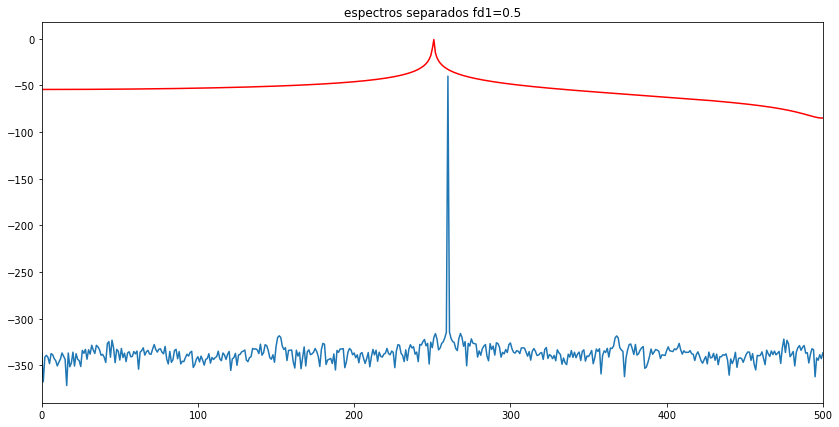

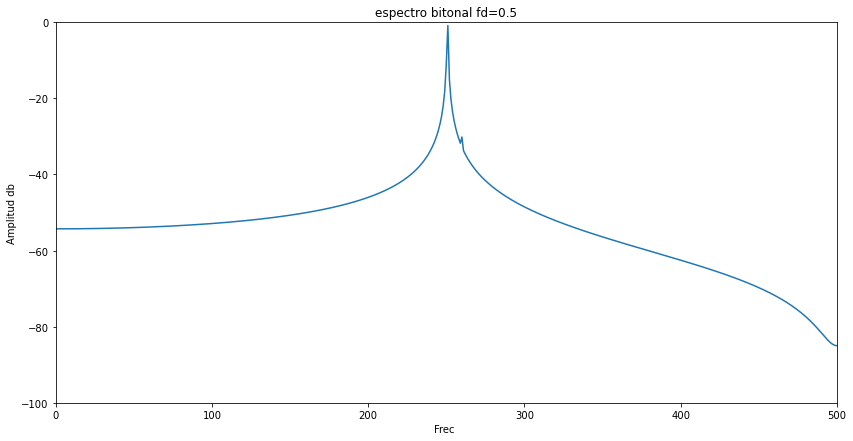

In [6]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.fft import fft
from IPython.display import HTML
from pandas import DataFrame


tus_resultados = [ 
                   '-55', # <-- acá debería haber numeritos :)
                   '-25', # <-- acá debería haber numeritos :)
                   '3' # <-- acá debería haber numeritos :)
                 ]

##############################################################################
def generador_senoidal (fs, f0, N, a0, p0):
    #     '''Genera una senial senoidal con los parametros indicados.

    # Keyword arguments:
    # a0 -- Valor pico de la senoidal
    # f0 -- frecuencia de la senial
    # ph -- fase de la senial
    # N -- numero de muestras de la senial
    # fs - frecuencia de muestro de la senial
                                

    # Returns: array of float, array of float

    # ''' 
   
    tt=np.arange(N/fs , step=1/fs)
    xx = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, xx   

##############################################################################

N  = 1000 # muestras
fs = 1000 # Hz
df = fs/N # resolucion espectral equivale a( 2 * np.pi/N )

a1 = 1  # Volts
p1 = 0 
f1 =  fs/4   # mitad dd la banda digital


a2_db = -40 # 20*log a1/a0 = -40
a2 = a1 *[ 10**(a2_db/20) ]
p2 = 0
f2 = f1 + 10 * df

Norma = N/2 # Criterio de Normalizacion

fd = [0, 0.01, 0.25, 0.5]  # arreglo para desintonias

for i in range(len(fd)):

    f1 = f1  + fd[i] * df 

    tt , xx1 = generador_senoidal(fs=fs , f0=f1 , N=N , a0=a1 , p0=p1)
    tt , xx2 = generador_senoidal(fs=fs , f0=f2 , N=N , a0=a2 , p0=p2)
    xx3 = xx1+xx2
    
    #evaluo espectro de las señales con numpy fft dentro del ciclo for#
    fftabs3 = np.abs(np.fft.fft(xx3))/Norma
    fftabs3 = 20*np.log10(fftabs3)
    freq3 = np.arange(0 , fs , df)
    
    fftabs1 = np.abs(np.fft.fft(xx1))/Norma
    fftabs1 = 20*np.log10(fftabs1)
    freq1 = np.arange( 0 , fs , df)
    
    fftabs2 = np.abs(np.fft.fft(xx2))/Norma
    fftabs2 = 20*np.log10(fftabs2)
    freq2 = np.arange(0 , fs , df)
   
    #Muestra graficos dentro del ciclo#
    
    plt.figure(i+1)
    plt.plot(freq1 , fftabs1 , color='r')
    plt.title('espectros separados fd1='+str(fd[i]))
    plt.plot(freq2 , fftabs2)
    plt.title('espectros separados fd1='+str(fd[i]))
    plt.xlim(0,500)
    
    plt.figure(i+5)
    plt.plot(freq3 , fftabs3 )
    plt.title('espectro bitonal fd=' + str(fd[i]))
    plt.xlim(0,fs/2)
    plt.ylim(-100 , 0)
    plt.ylabel('Amplitud db')
    plt.xlabel('Frec ')
    
    

#######################################
# Tu simulación que genere resultados #
#######################################


df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

In [23]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [24]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

In [5]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


NameError: name 'DataFrame' is not defined

<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

Text(0.5, 0, 'frequency')

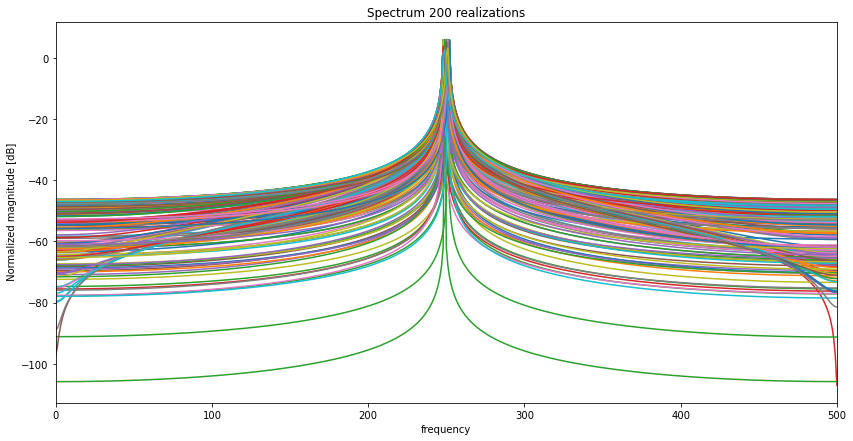

In [6]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

##############################################################################
def generador_senoidal (fs, f0, N, a0, p0):
    #     '''Genera una senial senoidal con los parametros indicados.

    # Keyword arguments:
    # a0 -- Valor pico de la senoidal
    # f0 -- frecuencia de la senial
    # ph -- fase de la senial
    # N -- numero de muestras de la senial
    # fs - frecuencia de muestro de la senial
                                

    # Returns: array of float, array of float

    # ''' 
    
    
    f0 = f0.reshape([1 , len(f0)])
    tt=np.arange(N/fs , step=1/fs)
    tt = tt.reshape([N , 1])
    xx = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, xx   

##############################################################################

N  = 1000 # muestras
fs = 1000 # Hz
df = fs/N # resolucion espectral equivale a( 2 * np.pi/N )

a0 = 2  # Volts
p1 = 0 
f0 =  fs/4   # mitad de la banda digital equivale a pi/2. Aclaracion: La banda digital es fs/2 (la
             # mitad de la frecuencia de muetreo). Que si en vez de normalizar en fs normalizo en 2pi
             # la banda digital seria pi.
Norma = N/2

m = 200
fr = np.random.uniform(-2 , 2 , m)

f1 = f0 + fr * df

tt , xx1 = generador_senoidal(fs=fs , f0=f1 , N=N , a0=a0 , p0=p1) 

fftabs = np.abs(np.fft.fft(xx1 , axis=0))/Norma
fftabs = 20*np.log10(fftabs)
freq = np.arange(0 , fs , df)



plt.figure(1)
plt.plot(freq , fftabs)
plt.xlim(0,500)
plt.title("Spectrum 200 realizations")
plt.ylabel(" Normalized magnitude [dB]")
plt.xlabel("frequency")



In [27]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [28]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [29]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,
